# 小眼球患者的IOL度数计算

## 数据读取和清洗

In [1]:
# 导入必要的工具包
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split


读取数据记录, 数据放置在`data\IOL_data.csv`文件中, 由于csv文件相对于excel文件更容易处理一些, 所以在excel中将原始数据另存为csv文件. 为方便操作, 将原来的中文字段名手工修改成英文字段名.

In [2]:
filename=os.path.join("data","IOL_data.csv") # 避免不同操作系统路径书写格式不同
df = pd.read_csv(filename)
df.head() # 显示数据前5行

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type,comment
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,NaN,1.00,-2.50,80.0,0.4,0.5,28.5,0.19,tecnis,NaN
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,NaN,-0.50,NaN,NaN,NaN,1.0,21.0,-0.25,tecnis,NaN
2,尉淑霞,74.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,-1.25,-1.50,85.0,NaN,NaN,25.0,-0.16,tecnis,NaN
3,尉淑霞,74.0,2,2,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,0.25,-2.00,105.0,NaN,NaN,24.0,-0.21,tecnis,颞侧视岛
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,NaN,-0.75,-0.75,90.0,0.6,0.8,23.5,-0.28,tecnis,NaN


其中, 包含的字段名为如下:

In [3]:
print(df.columns)

Index(['name', 'age', 'gender', 'eye', 'op', 'AL', 'K1', 'K2', 'ACD', 'Pen_B',
       'Pen_A', 'UBM_B', 'UBM_A', 'ACD_Pen', 'DS', 'DC', 'Axis', 'VA', 'BCVA',
       'IOL', 'target', 'IOL_type', 'comment'],
      dtype='object')


其中, 术前已知的数据字段是:

In [4]:
pre_op_columns=['age', 'gender', 'eye', 'op', 
             'AL', 'K1', 'K2', 'ACD',
             'Pen_B','UBM_B', 'ACD_Pen',
             'IOL', 'target', 'IOL_type']

术后测量得到的数据字段是:

In [5]:
post_op_columns=['DS', 'DC', 'Axis', 'VA', 'BCVA']

备注字段"comment", 对此次计算并无必要, 因此删除

In [6]:
df.drop('comment', axis=1, inplace=True)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,UBM_A,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,2.46,NaN,1.00,-2.50,80.0,0.4,0.5,28.5,0.19,tecnis
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,NaN,NaN,-0.50,NaN,NaN,NaN,1.0,21.0,-0.25,tecnis
2,尉淑霞,74.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,...,2.64,NaN,-1.25,-1.50,85.0,NaN,NaN,25.0,-0.16,tecnis
3,尉淑霞,74.0,2,2,1.0,NaN,NaN,NaN,NaN,NaN,...,3.29,NaN,0.25,-2.00,105.0,NaN,NaN,24.0,-0.21,tecnis
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,2.83,NaN,-0.75,-0.75,90.0,0.6,0.8,23.5,-0.28,tecnis


空缺的数据当前以NaN表示, 即“Not a Number”, 但NaN并不能加入计算, 所以需要对数据进行清洗.

数据清洗方案可以是:
* 清除包含NaN的数据行,
* 或将NaN替换成合理的数据.

对于柱镜度数DC和柱镜轴位, NaN数据可以使用0替换之

In [7]:
replace_nan_values={'DC':0, 'Axis':0}
df.fillna(value=replace_nan_values, inplace=True)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,UBM_A,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,2.46,NaN,1.00,-2.50,80.0,0.4,0.5,28.5,0.19,tecnis
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,NaN,NaN,-0.50,0.00,0.0,NaN,1.0,21.0,-0.25,tecnis
2,尉淑霞,74.0,2,1,1.0,NaN,NaN,NaN,NaN,NaN,...,2.64,NaN,-1.25,-1.50,85.0,NaN,NaN,25.0,-0.16,tecnis
3,尉淑霞,74.0,2,2,1.0,NaN,NaN,NaN,NaN,NaN,...,3.29,NaN,0.25,-2.00,105.0,NaN,NaN,24.0,-0.21,tecnis
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,2.83,NaN,-0.75,-0.75,90.0,0.6,0.8,23.5,-0.28,tecnis


对于其他关键的字段, 如果缺失数据, 则清除该行

In [8]:
key_columns=['age', 'gender', 'eye', 'op', 
#              'AL',  # 不用眼轴试试吧? 
             'K1', 'K2', 'ACD', 
             #'Pen_B','Pen_A',  # 这俩缺太多, 
             'UBM_B', 
             #'UBM_A', 'ACD_Pen', 
             'DS', 'DC', 'Axis', 
             #'VA', 'BCVA',
             'IOL', 'target', 'IOL_type']

In [9]:
df.dropna(subset=key_columns, inplace=True)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,UBM_A,ACD_Pen,DS,DC,Axis,VA,BCVA,IOL,target,IOL_type
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,2.46,NaN,1.00,-2.50,80.0,0.4,0.5,28.5,0.19,tecnis
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,NaN,NaN,-0.50,0.00,0.0,NaN,1.0,21.0,-0.25,tecnis
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,2.83,NaN,-0.75,-0.75,90.0,0.6,0.8,23.5,-0.28,tecnis
5,曾华霖,76.0,1,1,1.0,NaN,43.66,44.47,2.40,NaN,...,3.68,NaN,0.50,-1.25,105.0,0.8,1.0,20.5,-0.08,tecnis
6,曾华霖,76.0,1,2,1.0,NaN,43.60,44.47,2.31,NaN,...,3.52,NaN,0.25,-0.75,80.0,1.0,1.0,21.0,-0.05,tecnis


## 数据One-hot重编码

对于类别数据, 例如gender, eye, op等, 当前使用数字进行标注, 但这些数字之间并没有运算关系, 例如gender=2, 并不能够理解成gender=1+1, 因此在后续的计算中, 使用数字进行标注可能会引起模型预测的错误, 所以应当对类别数据进行one-hot编码, 例如:

|gender|male|female|
|:--|:--|:--|
|1|1|0|
|2|0|1|

In [10]:
categorical_columns=['gender', 'eye', 'op'] # 这些是类别形式的字段名
for c in categorical_columns:
    df[c]=pd.Categorical(df[c]) # 将这些字段设定称pandas的Categorical型数据

In [11]:
categorical_dict={'gender':["male","female"], 
                  'eye':['OD','OS'], 
                  'op':['op1', "op2",'op3','op4']}
for k, v in categorical_dict.items():
    dfDummies = pd.get_dummies(df[k])
    dfDummies.columns=v[:len(dfDummies.columns)] # 有可能有4种手术方式, 但因为数据清洗, 只剩下1种或者2种
    df = pd.concat([df, dfDummies], axis=1)
df.head()

,name,age,gender,eye,op,AL,K1,K2,ACD,Pen_B,...,IOL,target,IOL_type,male,female,OD,OS,op1,op2,op3
0,潘雅茹,80.0,2,2,3.0,NaN,41.62,43.49,1.96,NaN,...,28.5,0.19,tecnis,0,1,0,1,0,0,1
1,辛树林,62.0,1,1,1.0,NaN,41.26,41.82,2.92,NaN,...,21.0,-0.25,tecnis,1,0,1,0,1,0,0
4,汲爱芝,73.0,2,1,1.0,NaN,45.42,46.23,2.81,NaN,...,23.5,-0.28,tecnis,0,1,1,0,1,0,0
5,曾华霖,76.0,1,1,1.0,NaN,43.66,44.47,2.40,NaN,...,20.5,-0.08,tecnis,1,0,1,0,1,0,0
6,曾华霖,76.0,1,2,1.0,NaN,43.60,44.47,2.31,NaN,...,21.0,-0.05,tecnis,1,0,0,1,1,0,0


## 利用现有IOL公式计算

直接用机器学习猜出所有的公式可能需要很多数据, 所以不妨先使用现有公式进行初步的运算, 然后再用机器学习来拟合残差, 可能效果会更好

似乎也没啥作用, 反正先放在这吧

In [12]:
from compute_IOL import SRK_T, HOFFER_Q, Haigis # 这是以前写过的人工晶体计算公式, 存放再compute_IOL.py中, 此处直接导入

In [13]:
# A_const_dict={"hoya":118.4,} # 此处根据不同的IOL_type来设定A常数
# IOL_calc_func=SRK_T

In [14]:
# df['SRK_T']=df.apply(lambda row: 
#                         IOL_calc_func(row['AL'], 
#                               (row["K1"]+row["K2"])/2, 
#                               A_const_dict[row['IOL_type']], 
#                               row["target"]), 
#                         axis=1)
# df['Hoffer_Q']=df.apply(lambda row:
#                        HOFFER_Q(row['AL'],
#                                (row["K1"]+row["K2"])/2,
#                                row['ACD'],
#                                row['target']), 
#                         axis=1)
# df['Haigis']=df.apply(lambda row: # R,AC,L,A,Rx
#                        Haigis( (0.3375/((row["K1"]+row["K2"])/2))*1000,
#                                row['ACD'],
#                                row['AL'],
#                                A_const_dict[row['IOL_type']], 
#                                row['target']), 
#                         axis=1)

## 数据分组

将清理后数据分成: X, y, 用X来估计y, 其中又要分成训练集和测试集. 




In [15]:
X_columns=['age', 'male','female', 'OD','OS', 'op1', 
#              'AL', 
           'K1', 'K2', 'ACD',
#              'Pen_B',
             'UBM_B', 
#            'ACD_Pen',
             'IOL', 'target', 
#            'SRK_T', 'Hoffer_Q','Haigis'
          ]
# X_columns=['SRK_T', 'Hoffer_Q','Haigis'] # 如果用几个不同公式算出来结果, 是否可以预测出术后的屈光状态呢?
X=df[X_columns]

In [16]:
X.head()

,age,male,female,OD,OS,op1,K1,K2,ACD,UBM_B,IOL,target
0,80.0,0,1,0,1,0,41.62,43.49,1.96,1.23,28.5,0.19
1,62.0,1,0,1,0,1,41.26,41.82,2.92,2.27,21.0,-0.25
4,73.0,0,1,1,0,1,45.42,46.23,2.81,2.15,23.5,-0.28
5,76.0,1,0,1,0,1,43.66,44.47,2.40,2.03,20.5,-0.08
6,76.0,1,0,0,1,1,43.60,44.47,2.31,1.99,21.0,-0.05


In [17]:
y_columns=['DS', 'DC']
y=df['DS']+df['DC']/2

In [18]:
random_state=0
X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.2, random_state=random_state) # 总数据中有20%的数据作为测试集

In [19]:
print("训练集中, X_train具有{}行数据, y_train具有{}行数据".format(len(X_train),len(y_train)))
print("测试集中, X_test具有{}行数据, y_test具有{}行数据".format(len(X_test),len(y_test)))

训练集中, X_train具有45行数据, y_train具有45行数据
测试集中, X_test具有12行数据, y_test具有12行数据


## 机器学习


### 随机森林拟合

随机森林反正是设置最简单的模型了. 拿这个试试先.

使用

In [20]:
print("使用以下变量作为X:\n{}".format(X_columns))
print("对以下变量进行预测y:\n{}".format(y_columns))

使用以下变量作为X:
['age', 'male', 'female', 'OD', 'OS', 'op1', 'K1', 'K2', 'ACD', 'UBM_B', 'IOL', 'target']
对以下变量进行预测y:
['DS', 'DC']


In [21]:
# 导入必要的工具包
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [22]:
# Feature Scaling
# 将输入的数据进行缩放, 归一化, 这一步并非必须, 但是可能提高模型的训练效果. 
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [23]:
# 定义一个函数, 用来评估模型, 输出各种评估数据和绘图
def evaluate_model(regressor, X_train, y_train, X_test, y_test, y_pred):
    print('对预测结果的评估')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('R-squared score (training): {:.3f}'
         .format(regressor.score(X_train, y_train)))
    print('R-squared score (test): {:.3f}'
         .format(regressor.score(X_test, y_test)))
    fig, ax = plt.subplots()
    ax.plot(np.linspace(-2,1,20),np.linspace(-2,1,20),'-')
    ax.plot(y_test, y_pred, 'o')

对预测结果的评估
Mean Absolute Error: 0.25927083333333334
Mean Squared Error: 0.137699609375
Root Mean Squared Error: 0.37107897996922434
R-squared score (training): 0.842
R-squared score (test): -0.083


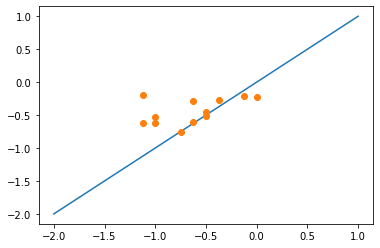

In [24]:
# 使用RandomForestRegressor建立一个拟合器
reg1 = RandomForestRegressor(random_state=random_state)
# 代入训练集进行训练
reg1.fit(X_train, y_train)
# 用训练好的模型对测试集进行训练
y_pred = reg1.predict(X_test)
# 评估结果
evaluate_model(reg1,X_train, y_train, X_test, y_test, y_pred)

### 调参

看来用默认参数还是不够好啊, 训练集的评分远远高于测试集的话, 提示过拟合了. 

虽然想躲, 但是还是调参炼丹吧!

参考这篇炼丹教程 https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

#### 首先看看当前默认的参数


In [25]:
from pprint import pprint
print('Parameters currently in use:\n')
pprint(reg1.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### 随机搜索法

在一定范围内随机搜索, 比较出最优的参数

In [26]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, 
                               param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  5.7min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

#### 看看随机搜索的最优结果

In [28]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

#### 评估这个最优解

对预测结果的评估
Mean Absolute Error: 0.25927083333333334
Mean Squared Error: 0.137699609375
Root Mean Squared Error: 0.37107897996922434
R-squared score (training): 0.398
R-squared score (test): -0.024


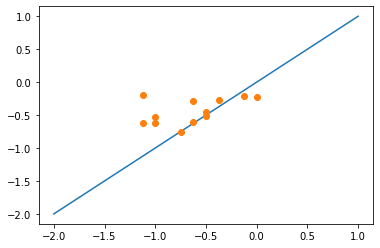

In [29]:
best_random = rf_random.best_estimator_
evaluate_model(best_random,X_train, y_train, X_test, y_test, y_pred)

#### 网格搜索

在随机搜索大致找到最优解之后(虽然仍然很渣, 但跑完流程吧), 可以在上述范围附近进行更为细致的网格搜索

In [30]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [31]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100,110 ],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1,2,3],
    'n_estimators': [600, 800, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [32]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_


Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   28.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  7.7min
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:  7.8min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 3,
 'n_estimators': 1000}

对预测结果的评估
Mean Absolute Error: 0.25927083333333334
Mean Squared Error: 0.137699609375
Root Mean Squared Error: 0.37107897996922434
R-squared score (training): 0.364
R-squared score (test): -0.044


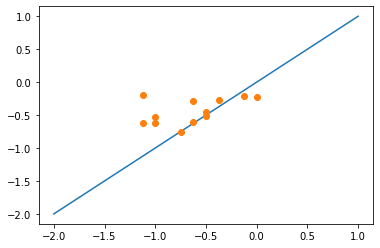

In [33]:
best_grid = grid_search.best_estimator_
evaluate_model(best_grid,X_train, y_train, X_test, y_test, y_pred)